In [1]:
# Clustering Customer
# Research question: 'What cluster does each customer fit into?'
# Clustering would help determine what cluster the customers fit into. The insights will be used to develop a target strategy for each customer cluster.

# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
# Import the data about the customers like Customer ID, age, gender, annual income and spending score.
# Spending Score is something assigned to the customer based on defined parameters like customer behavior and purchasing data.
df = pd.read_csv('https://raw.githubusercontent.com/Minh-Khoa-Pham/Housing-Price/main/Mall_Data.csv')


# Feature Selection
df_fs = df.drop(columns='CustomerID')

# Label Encoding
df_encoded = df_fs.replace({'Gender': {'Female':0, 'Male':1}})

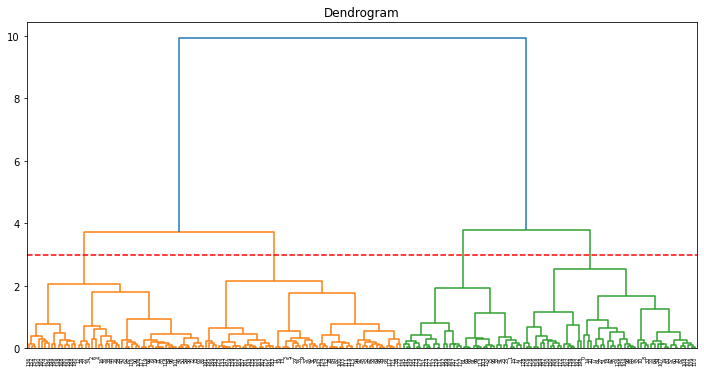

In [3]:
# Feature Scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(df_encoded)

# Import statements
import plotly.figure_factory as ff

# Plotting dendrogram to identify optimum number of clusters
mergings = linkage(X, method="ward")
plt.figure(figsize=(12, 6))
dendrogram(mergings)
plt.axhline(y=3, color='r', linestyle='--')
plt.title('Dendrogram')
plt.show()

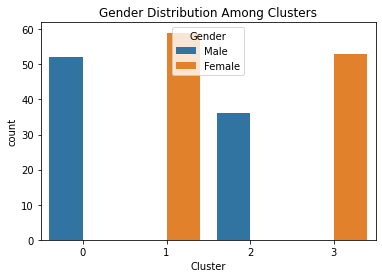

In [4]:
# Agglomerative clustering with 4 clusters
cluster = AgglomerativeClustering(distance_threshold=None, n_clusters=4).fit_predict(X)
df_fs['Cluster'] = cluster

# Categorical variable distribution among clusters
sns.countplot(data=df_fs, x='Cluster', hue='Gender')
plt.title('Gender Distribution Among Clusters')
plt.show()

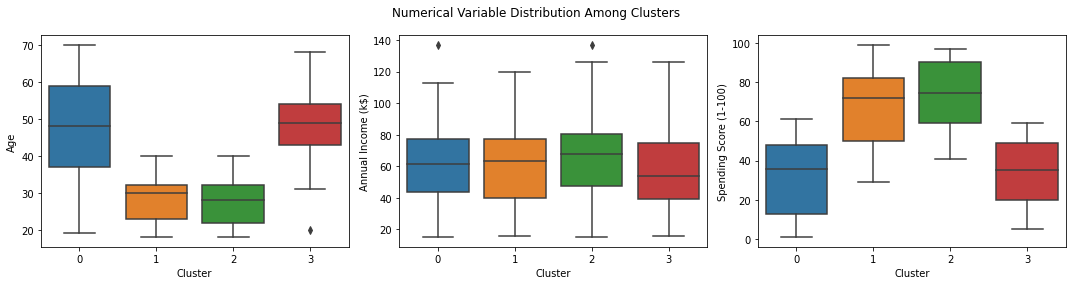

In [5]:
# Numerical variable distribution among clusters
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in range(len(cols)):
    sns.boxplot(data=df_fs, x='Cluster', y=cols[i], ax=axs[i])
fig.suptitle('Numerical Variable Distribution Among Clusters')
plt.tight_layout()
plt.show()

In [6]:
# Cluster Insights:
# All the clusters have almost identical annual income distributions.
#   Cluster 0: High age females with low spending score
#   Cluster 1: High age males with low spending score
#   Cluster 2: Low age females with high spending score
#   Cluster 3: Low age males with high spending score